In [67]:
import pandas as pd
import numpy as np

In [68]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [69]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [70]:
df.shape

(271116, 15)

In [71]:
df = df[df['Season'] == 'Summer']

In [72]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [73]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [74]:
df = df.merge(region_df, on='NOC', how='left')

In [75]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [76]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [77]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [78]:
df.duplicated().sum()

1385

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [81]:
pd.get_dummies(df['Medal'])

,Bronze,Gold,Silver
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
222547,False,False,False
222548,False,False,False
222549,False,False,False
222550,False,False,False


In [82]:
df.shape

(221167, 17)

In [83]:
df = pd.concat([df, pd.get_dummies(df['Medal'])], axis=1)

In [84]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index().head()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454


Incorrect data because team medals are being counted as individual medals

In [85]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False


In [86]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [87]:
medal_tally = medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

Medal tally is now more accurate.

We can see the count of medals won by colmbia between 1896-2016 is accurate.

In [102]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [101]:
medal_tally[medal_tally['region'] == 'Colombia']

,region,Gold,Silver,Bronze,total
58,Colombia,5,9,14,28


In [90]:
years= df['Year'].unique().tolist()

In [91]:
years.sort()

In [92]:
years.insert(0, 'overall')

In [93]:
country = np.unique(df['region'].dropna().values).tolist()

In [94]:
country.sort()

In [95]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [96]:
country.insert(0, 'overall')

In [97]:
country

['overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [98]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [103]:
medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [104]:
def fetch_medal_tally(df, year, country):
  medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
  flag = 0
  if year == 'overall' and country == 'overall':
    temp_df = medal_df
  if year == 'overall' and country != 'overall':
    flag=1
    temp_df = medal_df[medal_df['region'] == country]
  if year != 'overall' and country == 'overall':
    temp_df = medal_df[medal_df['Year'] == int(year)]
  if year != 'overall' and country != 'overall':
    temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]

  if flag == 1:
    x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
  else:
    x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

  x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

  print(x)


In [105]:
fetch_medal_tally(df, 'overall', 'overall')

            region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]


In [106]:
fetch_medal_tally(df, '2016' , 'USA')

  region  Gold  Silver  Bronze  total
0    USA    46      37      38    121


In [109]:
fetch_medal_tally(df, '1904', 'UK')

  region  Gold  Silver  Bronze  total
0     UK     1       1       0      2


In [110]:
fetch_medal_tally(df, '2012', 'India')

  region  Gold  Silver  Bronze  total
0  India     0       2       4      6



#Overall Analysis
*   No. of editions
*   No. of athletes
*   No. of cities/hosts
*   No. of events/sports
*   Participating Nations


In [112]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [121]:
# No. of editions
df['Year'].unique().shape[0]-1

28

In [122]:
# No. of athletes
df['Name'].nunique()

116122

In [123]:
# No. of cities/hosts
df['City'].nunique()

23

In [124]:
# No. of events/sports
df['Sport'].nunique()

52

In [134]:
# No. of participating nations
df['region'].nunique()

205

#Data Over Time

In [141]:
# Participating nations over time
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')

In [142]:
nations_over_time.rename(columns={'Year': 'Edition', 'count': 'No of nations'}, inplace=True)
nations_over_time

,Edition,No of nations
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [143]:
import plotly.express as px

In [145]:
fig = px.line(nations_over_time, x='Edition', y='No of nations')
fig.show()

In [146]:
# Events over time
events_over_time = df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')

In [147]:
events_over_time.rename(columns={'Year': 'Edition', 'count': 'No of events'}, inplace=True)
events_over_time

,Edition,No of events
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [148]:
fig = px.line(events_over_time, x='Edition', y='No of events')
fig.show()

In [150]:
# Athletes over tim
athletes_over_time = df.drop_duplicates(['Year', 'Name'])['Year'].value_counts().reset_index().sort_values('Year')

In [151]:
athletes_over_time.rename(columns={'Year': 'Edition', 'count': 'No of athletes'}, inplace=True)
athletes_over_time

,Edition,No of athletes
28,1896,176
25,1900,1220
27,1904,650
26,1906,841
23,1908,2024
22,1912,2409
21,1920,2675
19,1924,3256
20,1928,3246
24,1932,1922


In [152]:
fig = px.line(athletes_over_time, x='Edition', y='No of athletes')
fig.show()

#Heatmap

In [154]:
X = df.drop_duplicates(['Year', 'Sport', 'Event'])

In [155]:
X.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Year', ylabel='Sport'>

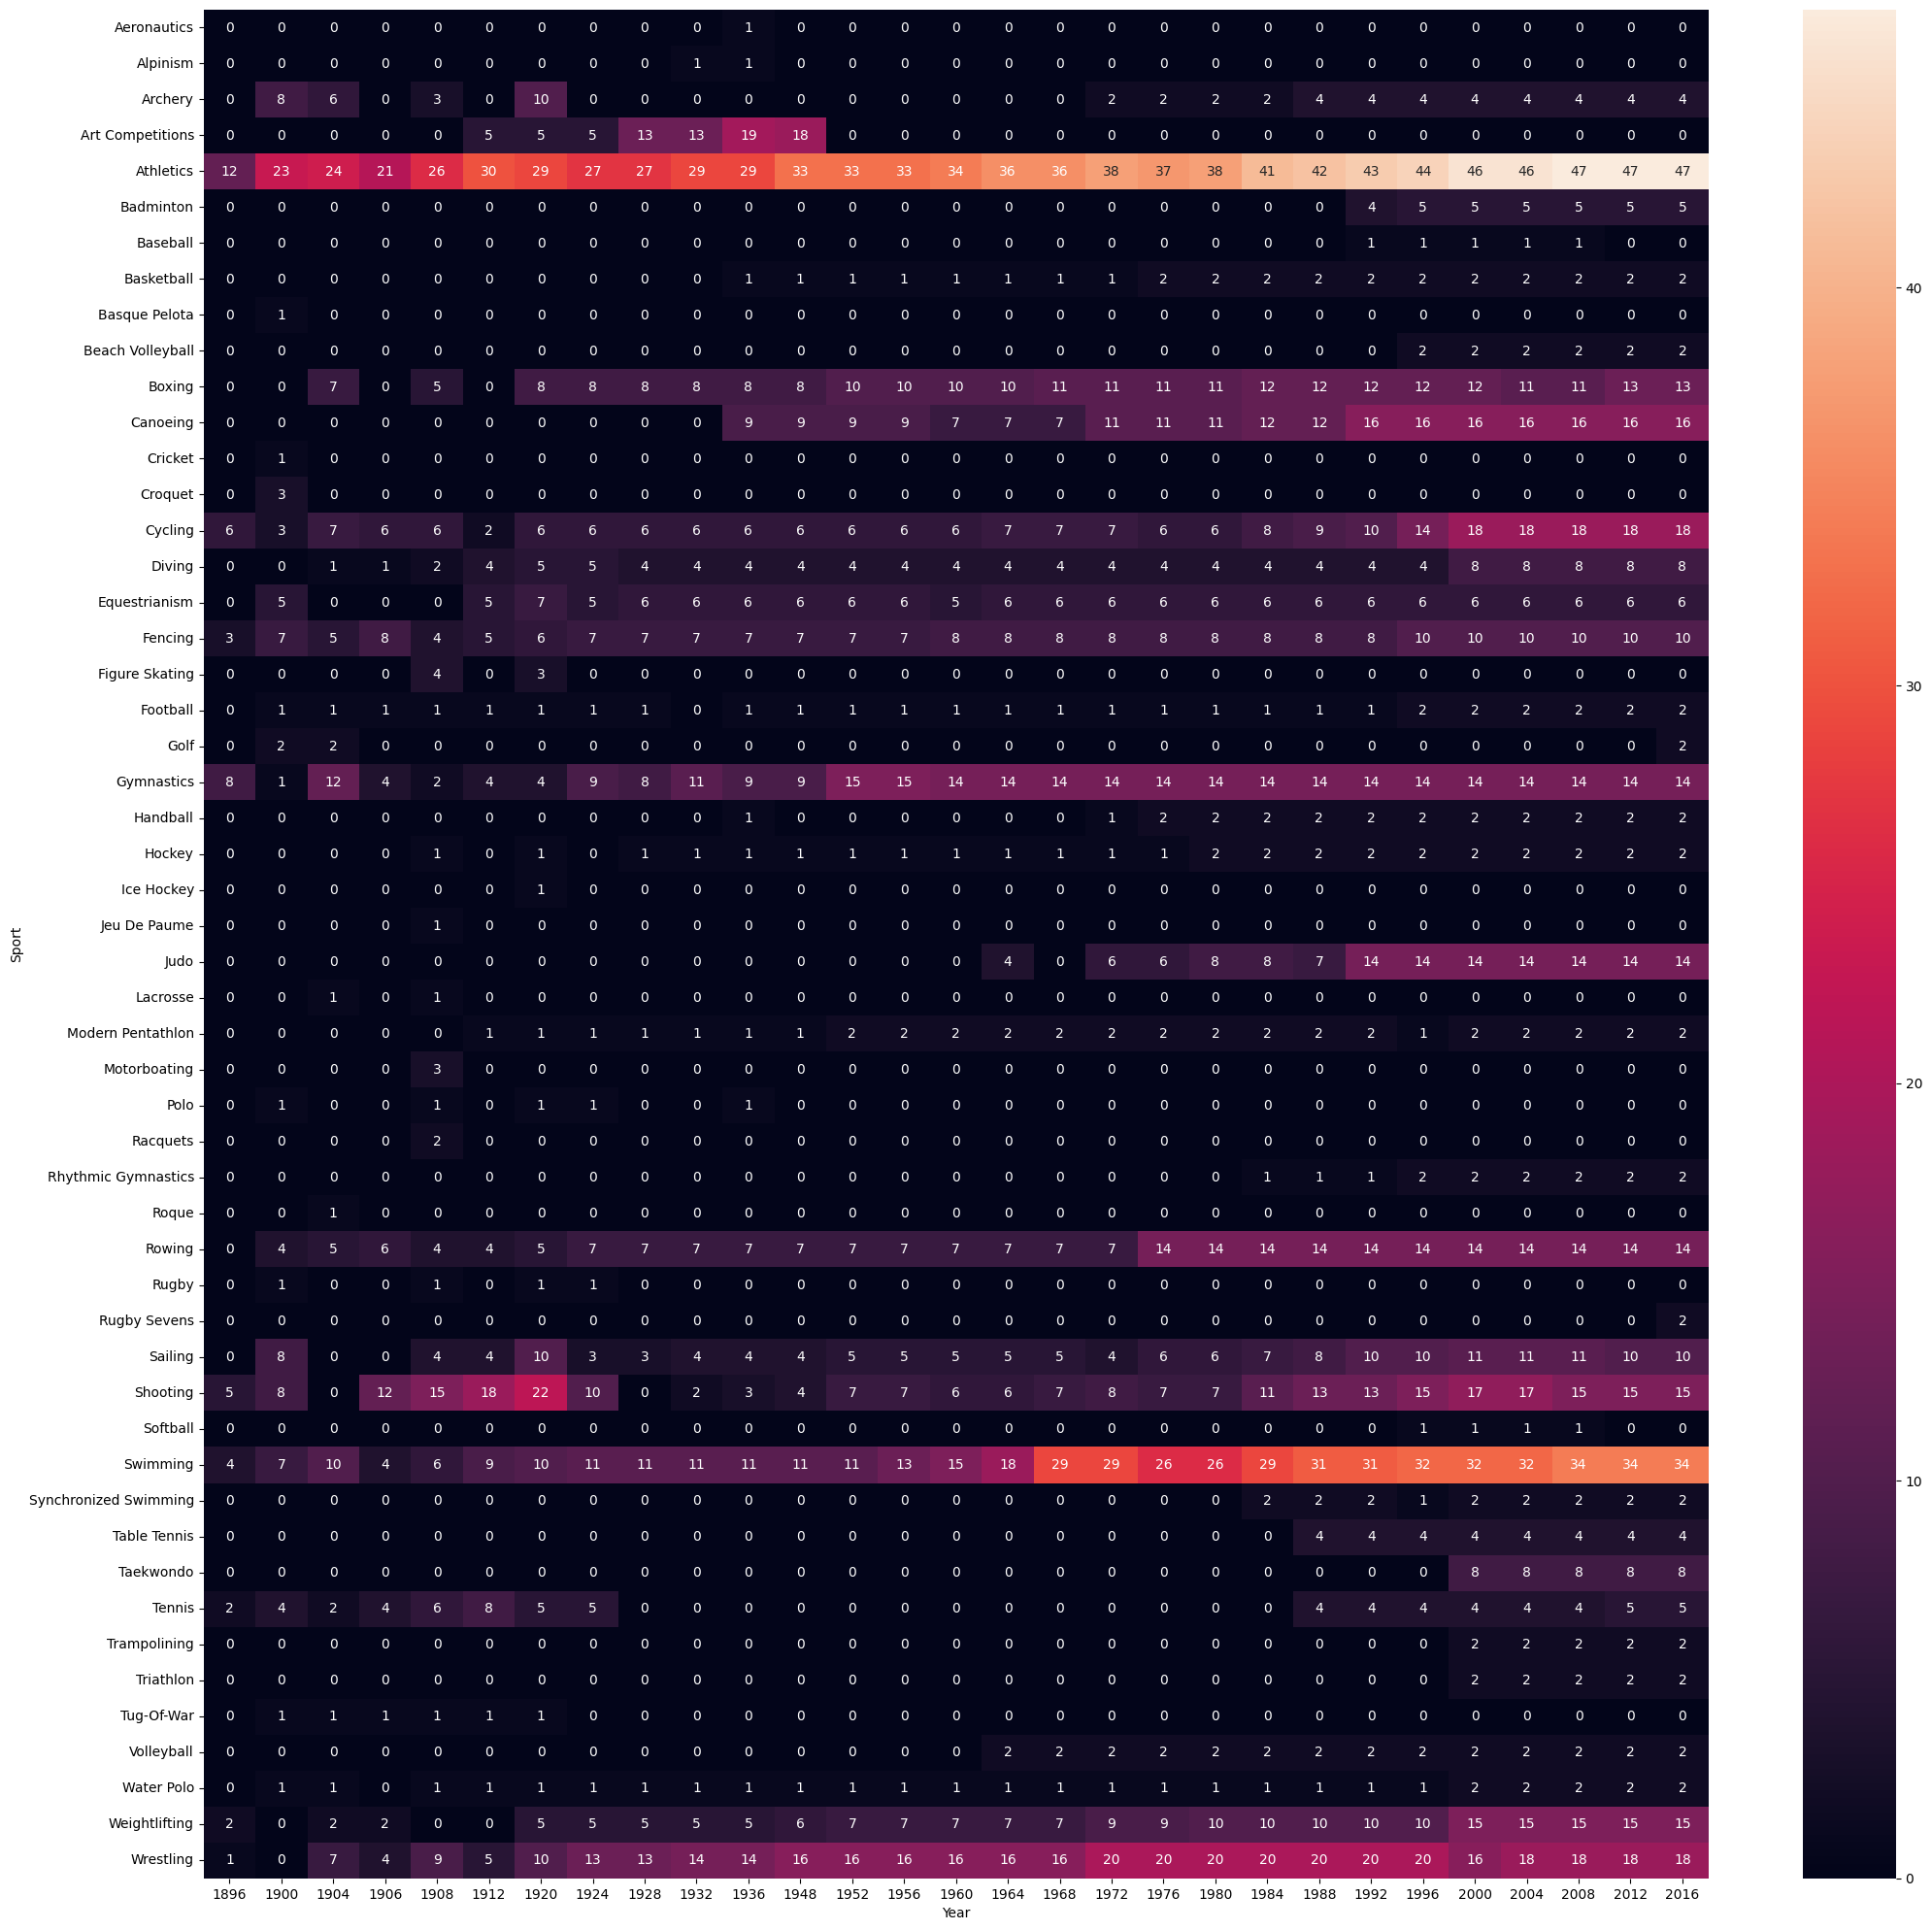

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
sns.heatmap(X.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'), annot=True)

#Most Succesfull Athletes

In [267]:
def most_successful(df, sport):
    # Drop rows where 'Medal' is NaN and filter by country
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    # Get the top 10 most successful athletes by name count
    top_athletes = temp_df['Name'].value_counts().reset_index().head(15)
    top_athletes.columns = ['Name', 'Medals']

    # Merge with the original DataFrame on the 'Name' column
    merged_df = top_athletes.merge(df, on='Name', how='left')[['Name', 'Medals', 'Sport', 'region']].drop_duplicates('Name')

    return merged_df

In [269]:
most_successful(df, 'overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


#Country wise analysis


*   Countrywise medal tally per year
*   What countries are good at using heatmap
*   Top 10 successful athletes



In [217]:
temp_df = df.dropna(subset=['Medal'])

In [218]:
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

<ipython-input-218-a7c679d1ac18>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Medal tally per year

In [230]:
def medal_over_year(df, country):
  temp_df = df.dropna(subset=['Medal'])
  temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)
  new_df = temp_df[df['region'] == country]
  final_df = new_df.groupby('Year').count()['Medal'].reset_index()
  fig = px.line(final_df, x='Year', y='Medal')
  fig.show()

In [235]:
# No. of medals won by USA over years
medal_over_year(df, 'USA')

<ipython-input-230-1d12fdc86465>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-230-1d12fdc86465>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



##Heatmap describing the sports a specific country is good at

In [236]:
def country_sport(df, country):
  temp_df = df.dropna(subset=['Medal'])
  temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)
  new_df = temp_df[df['region'] == country]
  pt = new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0)
  plt.figure(figsize=(20,20))
  sns.heatmap(pt, annot=True)

<ipython-input-236-4d687c61638f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-236-4d687c61638f>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



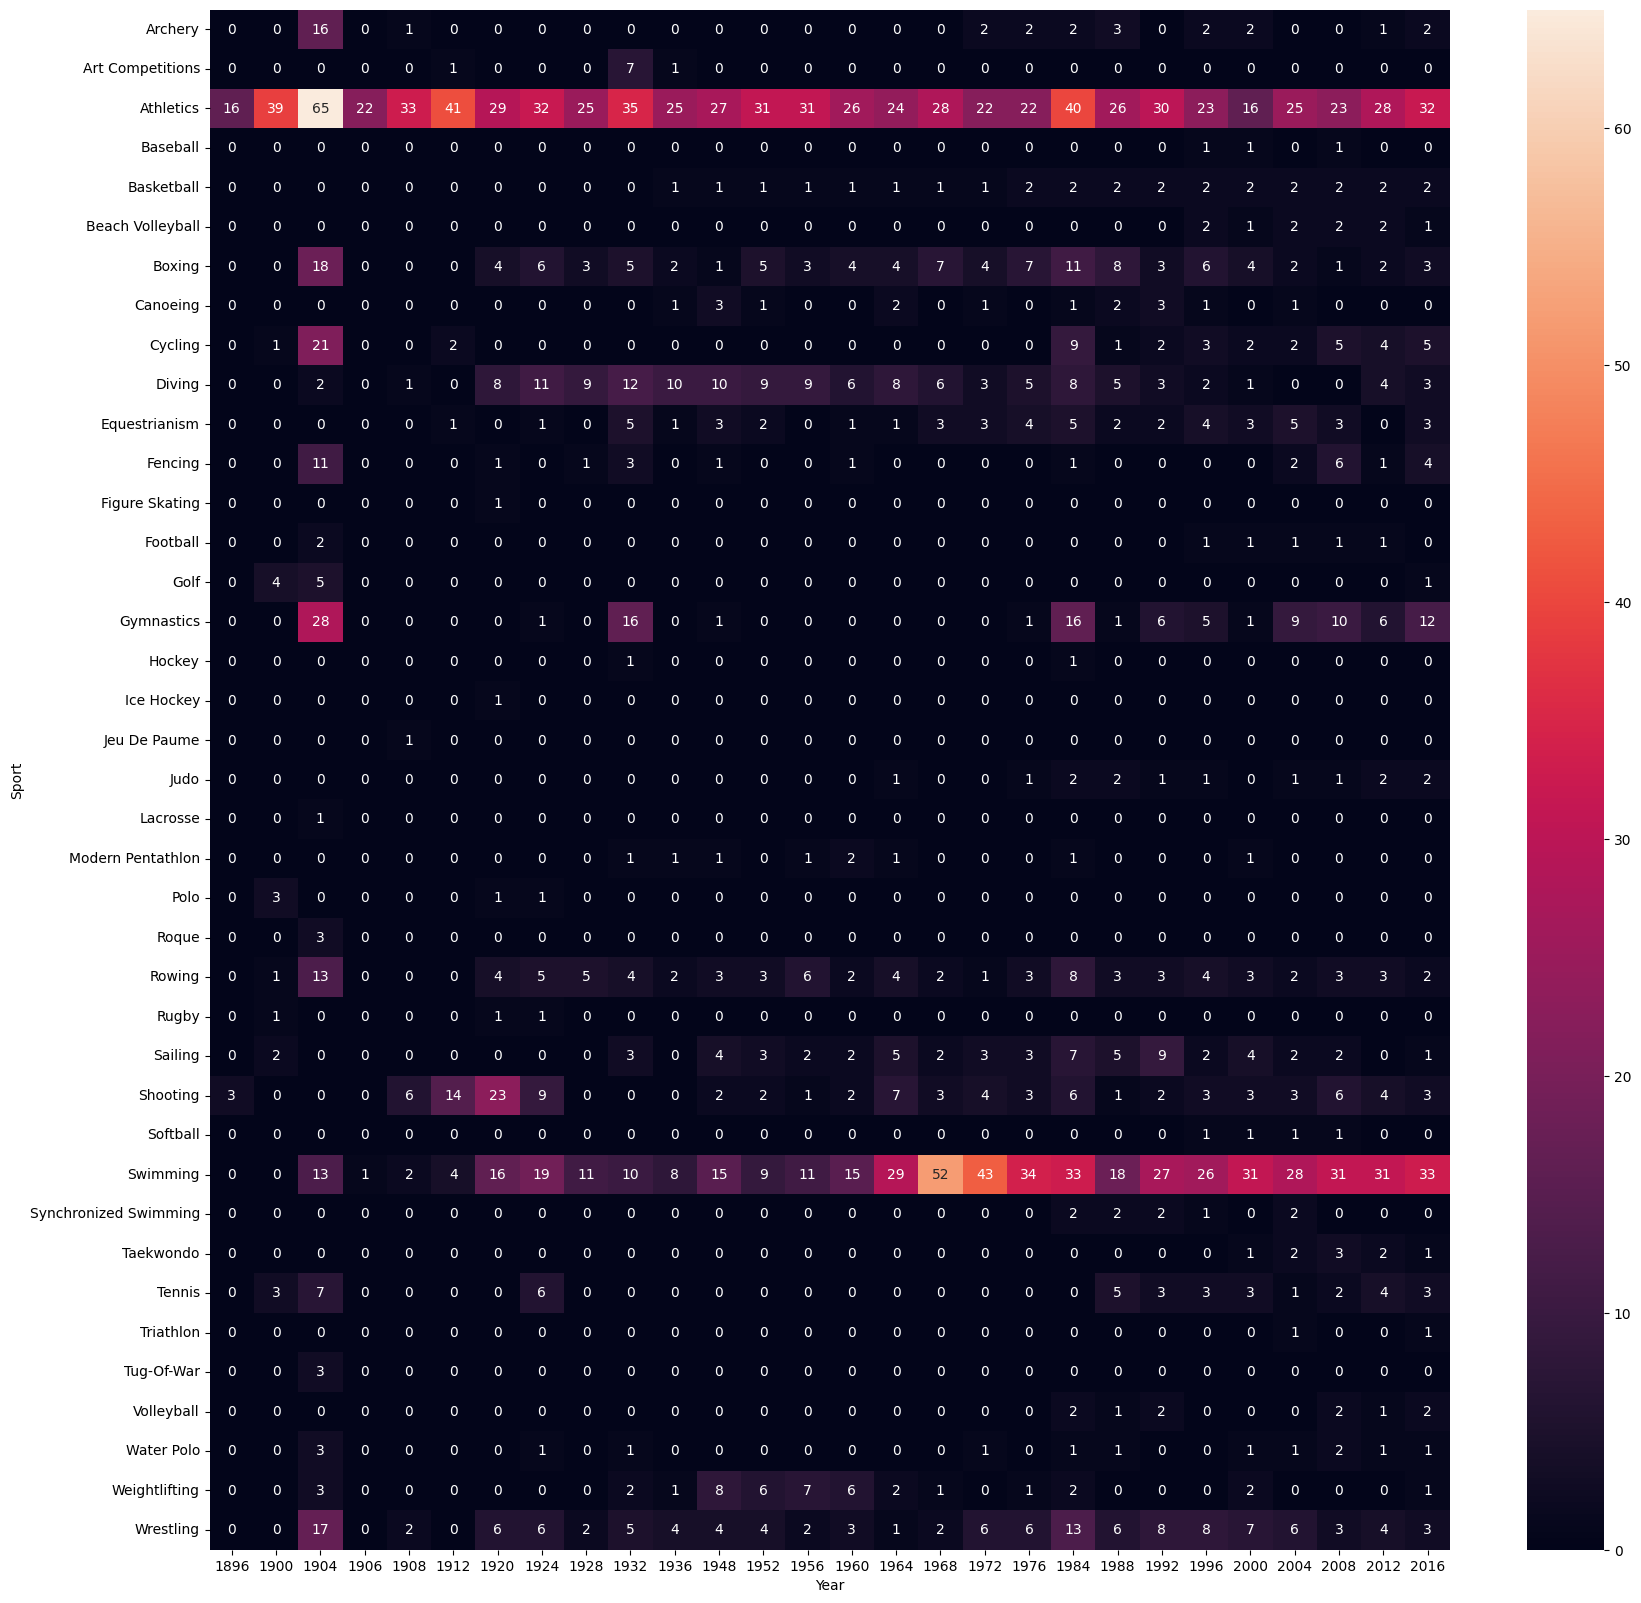

In [241]:
# Heatmap denotes the result of USA in specofic sports
country_sport(df, 'USA')

##Top 10 athletes

In [258]:
def top_10_most_successful(df, country):
    # Drop rows where 'Medal' is NaN and filter by country
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region'] == country]

    # Get the top 10 most successful athletes by name count
    top_athletes = temp_df['Name'].value_counts().reset_index().head(10)
    top_athletes.columns = ['Name', 'Medals']

    # Merge with the original DataFrame on the 'Name' column
    merged_df = top_athletes.merge(df, on='Name', how='left')[['Name', 'Medals', 'Sport']].drop_duplicates('Name')

    return merged_df

In [270]:
#Top 10 most successfull Olympic athletes in USA
top_10_most_successful(df, 'USA')

,Name,Medals,Sport
0,"Michael Fred Phelps, II",28,Swimming
30,Ryan Steven Lochte,12,Swimming
44,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
61,Natalie Anne Coughlin (-Hall),12,Swimming
73,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
86,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
98,Carl Townsend Osburn,11,Shooting
114,Mark Andrew Spitz,11,Swimming
126,"Raymond Clarence ""Ray"" Ewry",10,Athletics
136,"Frederick Carlton ""Carl"" Lewis",10,Athletics


#Athlete Wise Analysis

In [271]:
import plotly.figure_factory as ff

In [272]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

In [276]:
athlete_df['Age'].dropna()

0         24.0
1         23.0
2         24.0
3         34.0
4         18.0
          ... 
222544    19.0
222546    23.0
222548    21.0
222549    24.0
222551    33.0
Name: Age, Length: 110734, dtype: float64

##Distribution of Age

In [277]:
fig = ff.create_distplot([athlete_df['Age'].dropna()], ['Age'], show_hist=False, show_rug=False)
fig.show()

In [278]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [279]:
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'], show_hist=False, show_rug=False)
fig.show()

##Distribution of Gold Medalist Athlete's Age wrt Sports

In [280]:
 famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [282]:
X=[]
name=[]
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    X.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

In [284]:
fig = ff.create_distplot(X, name, show_hist=False, show_rug=False)
fig.update_layout(autosize=False, width=1000, height=600)
fig.show()

##Distribution of Athlete's Height and Weight for a specific sport

In [285]:
athlete_df['Medal'].fillna('No Medal', inplace=True)

In [303]:
def weight_height_sport(athlete_df, sport):
  plt.figure(figsize=(10,10))
  if sport != 'overall':
    temp_df = athlete_df[athlete_df['Sport'] == sport]
  else:
    temp_df = athlete_df
  sns.scatterplot(x='Weight', y='Height', data=temp_df, hue='Medal', style='Sex', s=100)

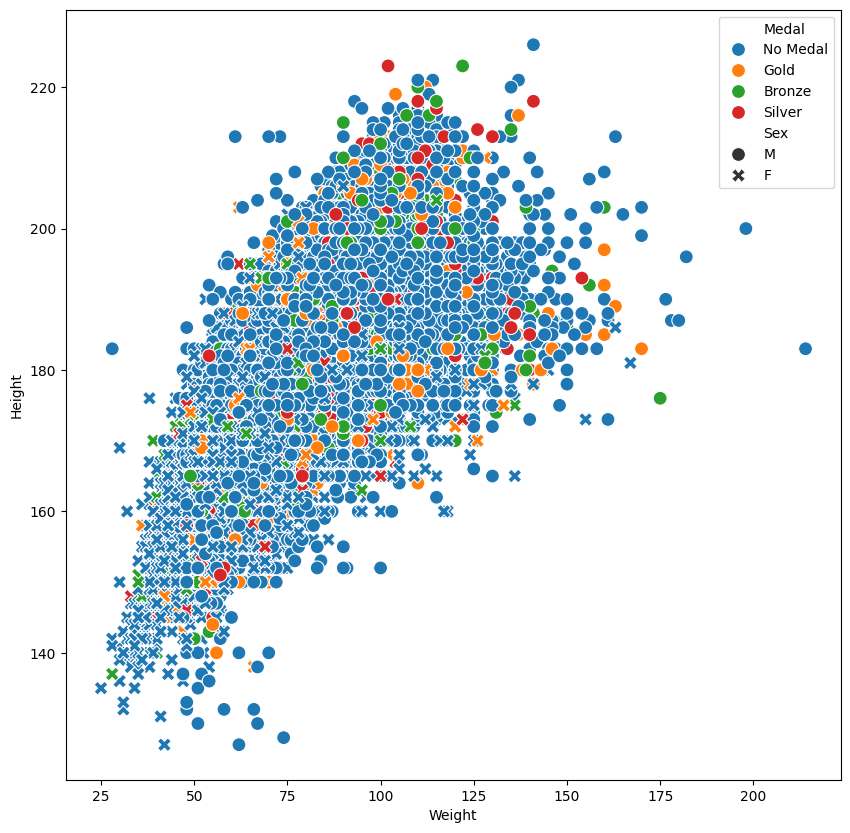

In [304]:
weight_height_sport(athlete_df, 'overall')

##Participation of Male vs Female

In [305]:
male = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
female = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [312]:
final = male.merge(female, on='Year' , how='left')
final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)
final.fillna(0, inplace=True)

In [313]:
fig = px.line(final, x='Year', y=['Male', 'Female'])
fig.show()